Nomes: <br>
Aimê Gomes da Nobrega (Nro USP 11882429) <br>
Adriana Akemi Yamaguti (Nro USP 11915623)

# Lab: Introduction to R

Exemplos do livro feitos em Python a fim de aprendizado.

In [2]:
# import pandas
import pandas as pd

# import matplotlib 
import matplotlib.pyplot as plt

# import seaborn
import seaborn as sns

In [3]:


# read Auto csv file
df = pd.read_csv('Auto.csv')

# get dimensions of the dataframe
df.shape

(397, 9)

397 observações e 9 colunas

In [4]:
# check nan values
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [5]:
# column names of the dataframe
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

<AxesSubplot:xlabel='mpg', ylabel='cylinders'>

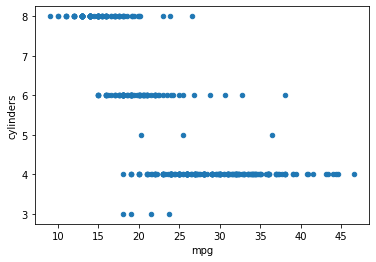

In [6]:
# scatter plot of mpg vs. cylinders
df.plot(kind='scatter', x='mpg', y='cylinders')

Tratado como quantitativo. Melhor analisar como qualitativo pela quantidade pequena de valores possíveis para cilíndros e usar boxplot

<AxesSubplot:title={'center':'mpg'}, xlabel='cylinders'>

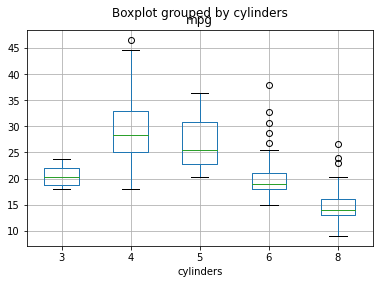

In [7]:
# transform cylinders to categorical variable
df['cylinders'] = df['cylinders'].astype('category')

# boxplot of mpg vs. cylinders
df.boxplot(column='mpg', by='cylinders')

<AxesSubplot:title={'center':'mpg'}, xlabel='cylinders'>

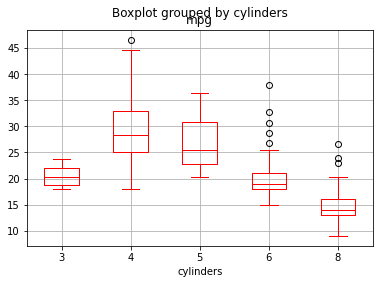

In [8]:
# boxplot of mpg vs. cylinders with color red
df.boxplot(column='mpg', by='cylinders', color='red')

<AxesSubplot:title={'center':'mpg'}, xlabel='cylinders'>

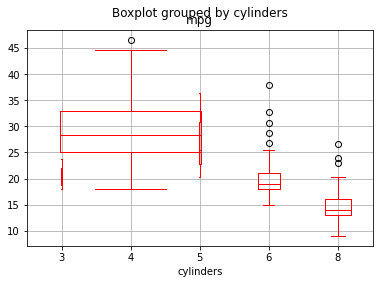

In [9]:
# calculate the sample size for each group of cylinders and store it in a numpy array
sample_size = df.groupby('cylinders').size().values

# get q1 and q3 for each group of cylinders in a series
q1 = df.groupby('cylinders')['mpg'].quantile(0.25)
q3 = df.groupby('cylinders')['mpg'].quantile(0.75)

# calculate the interquartile range
iqr = q3 - q1

# calculate group widths
group_widths = sample_size / df.shape[0] * iqr * 0.5

# Create the grouped box plot with adjusted box widths with color red
df.boxplot(column='mpg', by='cylinders', color='red', widths=group_widths)

<AxesSubplot:title={'center':'mpg'}, xlabel='cylinders'>

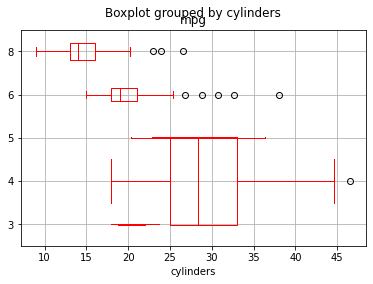

In [10]:
# boxplot of mpg vs. cylinders with color red, adjusted box widths and horizontal orientation
df.boxplot(column='mpg', by='cylinders', color='red', widths=group_widths, vert=False)

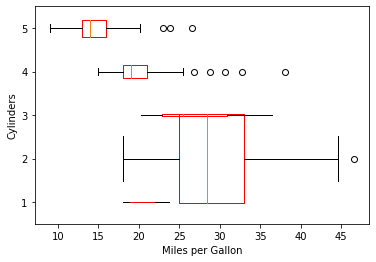

In [11]:
# Create the box plot with adjusted box width
fig, ax = plt.subplots()

# Create the grouped box plot with adjusted box widths with color red
ax.boxplot(df.groupby("cylinders")["mpg"].apply(list), widths=group_widths, vert=False, boxprops={'color': 'red'})

# set the labels for the axes
ax.set_xlabel('Miles per Gallon')
ax.set_ylabel('Cylinders')

# show the plot
plt.show()

<AxesSubplot:ylabel='Frequency'>

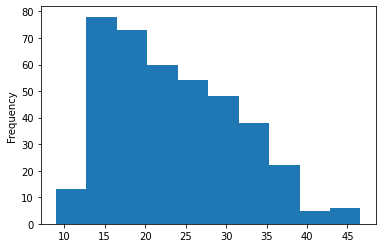

In [12]:
# plot histogram of mpg 
df['mpg'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

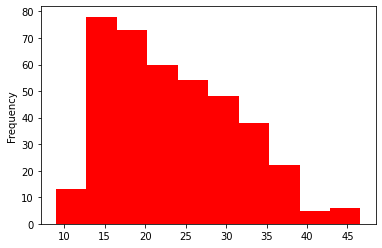

In [13]:
# plot histogram of mpg with color red
df['mpg'].plot(kind='hist', color='red')

<AxesSubplot:ylabel='Frequency'>

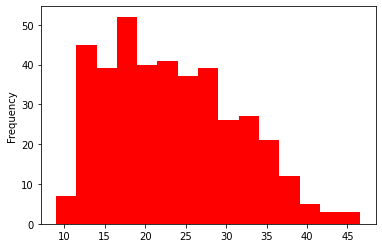

In [14]:
# plot histogram of mpg with color red and 15 bins
df['mpg'].plot(kind='hist', color='red', bins=15)

array([[<AxesSubplot:xlabel='mpg', ylabel='mpg'>,
        <AxesSubplot:xlabel='displacement', ylabel='mpg'>,
        <AxesSubplot:xlabel='weight', ylabel='mpg'>,
        <AxesSubplot:xlabel='acceleration', ylabel='mpg'>,
        <AxesSubplot:xlabel='year', ylabel='mpg'>,
        <AxesSubplot:xlabel='origin', ylabel='mpg'>],
       [<AxesSubplot:xlabel='mpg', ylabel='displacement'>,
        <AxesSubplot:xlabel='displacement', ylabel='displacement'>,
        <AxesSubplot:xlabel='weight', ylabel='displacement'>,
        <AxesSubplot:xlabel='acceleration', ylabel='displacement'>,
        <AxesSubplot:xlabel='year', ylabel='displacement'>,
        <AxesSubplot:xlabel='origin', ylabel='displacement'>],
       [<AxesSubplot:xlabel='mpg', ylabel='weight'>,
        <AxesSubplot:xlabel='displacement', ylabel='weight'>,
        <AxesSubplot:xlabel='weight', ylabel='weight'>,
        <AxesSubplot:xlabel='acceleration', ylabel='weight'>,
        <AxesSubplot:xlabel='year', ylabel='weight'>,
       

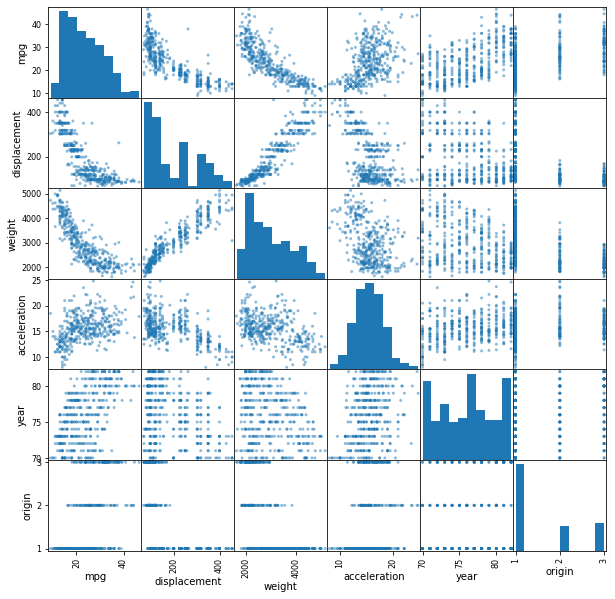

In [15]:
# plot scatterplot matrix
pd.plotting.scatter_matrix(df, figsize=(10,10))

array([[<AxesSubplot:xlabel='mpg', ylabel='mpg'>,
        <AxesSubplot:xlabel='displacement', ylabel='mpg'>,
        <AxesSubplot:xlabel='weight', ylabel='mpg'>,
        <AxesSubplot:xlabel='acceleration', ylabel='mpg'>],
       [<AxesSubplot:xlabel='mpg', ylabel='displacement'>,
        <AxesSubplot:xlabel='displacement', ylabel='displacement'>,
        <AxesSubplot:xlabel='weight', ylabel='displacement'>,
        <AxesSubplot:xlabel='acceleration', ylabel='displacement'>],
       [<AxesSubplot:xlabel='mpg', ylabel='weight'>,
        <AxesSubplot:xlabel='displacement', ylabel='weight'>,
        <AxesSubplot:xlabel='weight', ylabel='weight'>,
        <AxesSubplot:xlabel='acceleration', ylabel='weight'>],
       [<AxesSubplot:xlabel='mpg', ylabel='acceleration'>,
        <AxesSubplot:xlabel='displacement', ylabel='acceleration'>,
        <AxesSubplot:xlabel='weight', ylabel='acceleration'>,
        <AxesSubplot:xlabel='acceleration', ylabel='acceleration'>]],
      dtype=object)

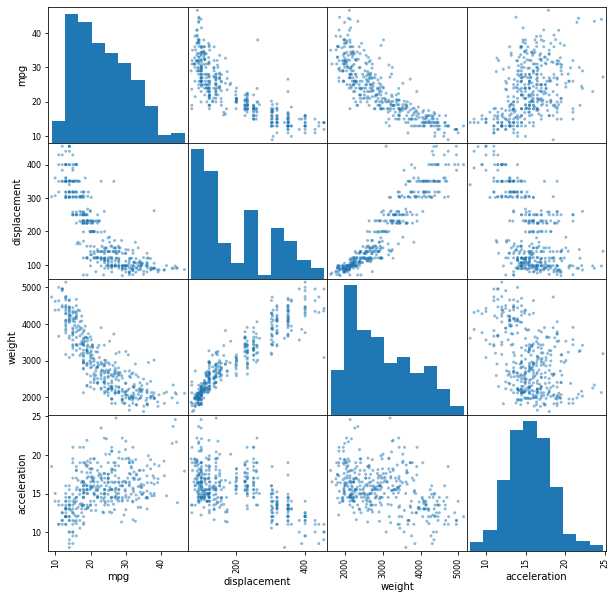

In [16]:
# plot scatterplot matrix of mpg, displacement, horsepower, weight and acceleration
pd.plotting.scatter_matrix(df[['mpg', 'displacement', 'horsepower', 'weight', 'acceleration']], figsize=(10,10))

In [17]:
# print summary 
df.describe()

,mpg,displacement,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,193.532746,2970.261965,15.555668,75.994962,1.574307
std,7.825804,104.379583,847.904119,2.749995,3.690005,0.802549
min,9.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,104.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,262.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [18]:
# print summary of mpg
df['mpg'].describe()

count    397.000000
mean      23.515869
std        7.825804
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

# Exercício 9
This exercise involves the Auto data set studied in the lab. Make sure that the missing values have been removed from the data.

In [19]:
# check missing values
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

a) Which of the predictors are quantitative, and which are qualitative?

Quantitative predictors:<br>

- mpg (miles per gallon)
- displacement (displacement of the engine in cubic inches)
- horsepower (horsepower of the engine)
- weight (weight of the vehicle in pounds)
- acceleration (acceleration time from 0 to 60 mph, in seconds)
- model year (model year of the vehicle, in two digits)

Qualitative predictors:<br>

- name (name of the vehicle, including make and model)
- origin (origin of the vehicle, coded as 1 for American, 2 for European, and 3 for Japanese)
- cylinders (number of cylinders in the engine, qualitative since there are only a small number of possible values)

In [31]:
# transform name and origin to categorical variables
df['name'] = df['name'].astype('category')
df['origin'] = df['origin'].astype('category')

# transform mpg, displacement, horsepower, weight, acceleration and year to numeric variables
df['mpg'] = pd.to_numeric(df['mpg'], errors='coerce')
df['displacement'] = pd.to_numeric(df['displacement'], errors='coerce')
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df['weight'] = pd.to_numeric(df['weight'], errors='coerce')
df['acceleration'] = pd.to_numeric(df['acceleration'], errors='coerce')
df['year'] = pd.to_numeric(df['year'], errors='coerce')

# print data types
df.dtypes

mpg              float64
cylinders       category
displacement     float64
horsepower       float64
weight             int64
acceleration     float64
year               int64
origin          category
name            category
dtype: object

b) What is the range of each quantitative predictor? You can answer this using the range() function

In [21]:
# calculate the range of each quantitative predictor
df.max() - df.min()

C:\Users\anbrg\AppData\Local\Temp\ipykernel_21116\4043998780.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.max() - df.min()


mpg               37.6
displacement     387.0
horsepower       184.0
weight          3527.0
acceleration      16.8
year              12.0
dtype: float64

 The range is simply the difference between the maximum and minimum values of each predictor. Note that the qualitative predictors are not included in this calculation.

c) What is the mean and standard deviation of each quantitative
predictor?

In [22]:
# mean of each quantitative predictor
df.mean()

C:\Users\anbrg\AppData\Local\Temp\ipykernel_21116\1797243226.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


mpg               23.515869
displacement     193.532746
horsepower       104.469388
weight          2970.261965
acceleration      15.555668
year              75.994962
dtype: float64

In [23]:
# standard deviation of each quantitative predictor
df.std()

C:\Users\anbrg\AppData\Local\Temp\ipykernel_21116\430393248.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


mpg               7.825804
displacement    104.379583
horsepower       38.491160
weight          847.904119
acceleration      2.749995
year              3.690005
dtype: float64

d) Now remove the 10th through 85th observations. What is the range, mean, and standard deviation of each predictor in the subset of the data that remains?

In [24]:
# remove the 10th through 85th observations
df1 = df.drop(df.index[10:85])

# get range, mean and standard deviation of each quantitative predictor
df1.max() - df1.min()

C:\Users\anbrg\AppData\Local\Temp\ipykernel_21116\725344160.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.max() - df1.min()


mpg               35.6
displacement     387.0
horsepower       184.0
weight          3348.0
acceleration      16.3
year              12.0
dtype: float64

In [25]:
df1.mean()

C:\Users\anbrg\AppData\Local\Temp\ipykernel_21116\2053335143.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.mean()


mpg               24.409317
displacement     187.680124
horsepower       101.235849
weight          2936.807453
acceleration      15.700621
year              77.130435
dtype: float64

In [26]:
df1.std()

C:\Users\anbrg\AppData\Local\Temp\ipykernel_21116\3039516898.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df1.std()


mpg               7.913357
displacement    100.120925
horsepower       36.185088
weight          810.987533
acceleration      2.706436
year              3.131849
dtype: float64

e) Using the full data set, investigate the predictors graphically, using scatterplots or other tools of your choice. Create some plots highlighting the relationships among the predictors. Comment on your findings.

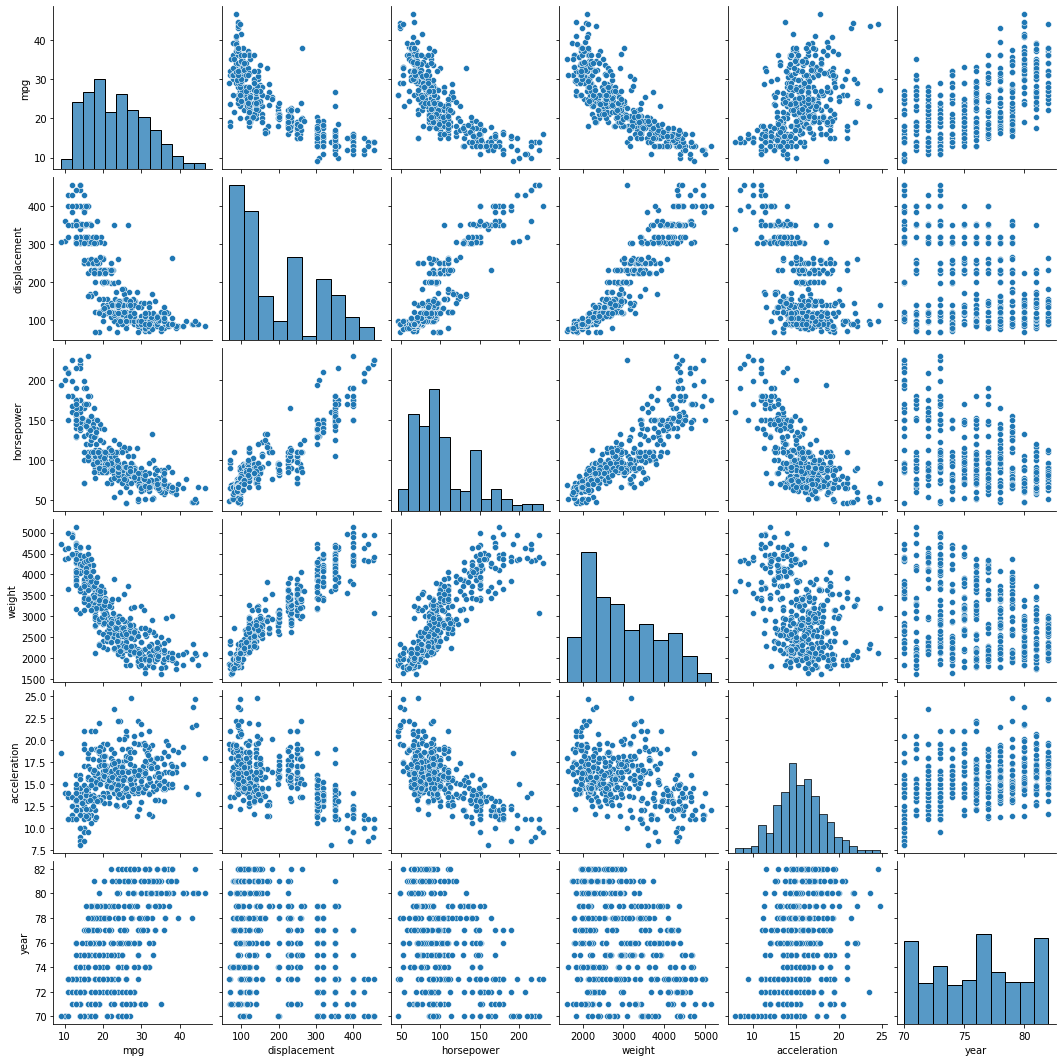

In [27]:
# pairplot of variables
sns.pairplot(df)

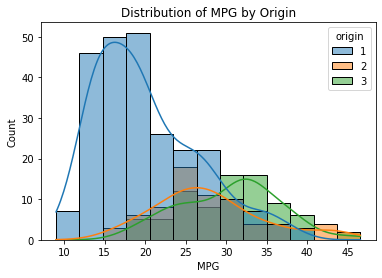

In [28]:
# distribution plot of mpg by origin
sns.histplot(data=df, x='mpg', hue='origin', kde=True)
plt.xlabel('MPG')
plt.title('Distribution of MPG by Origin')
plt.show()

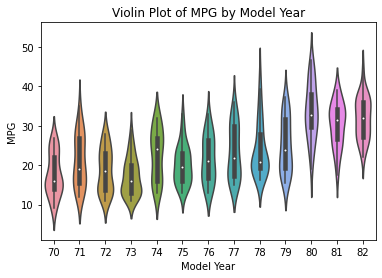

In [29]:
# Violin plot of mpg by model year
sns.violinplot(data=df, x='year', y='mpg')
plt.xlabel('Model Year')
plt.ylabel('MPG')
plt.title('Violin Plot of MPG by Model Year')
plt.show()

9) Suppose that we wish to predict gas mileage (mpg) on the basis
of the other variables. Do your plots suggest that any of the
other variables might be useful in predicting mpg? Justify your
answer

<AxesSubplot:>

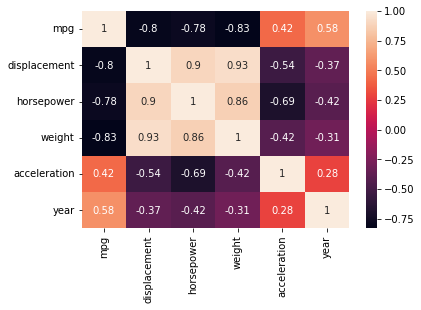

In [30]:
# plot heatmap of correlation matrix of quantitative predictors
import seaborn as sns
sns.heatmap(df[['mpg', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']].corr(), annot=True)

Based on the scatter plots and correlation matrix, the best variables to predict miles per gallon (mpg) in the Auto dataset are **displacement, horsepower, weight, and acceleration**.

These variables have the strongest correlations with mpg and also show a clear linear relationship in the scatter plots. Specifically, displacement, horsepower, and weight have strong negative correlations with mpg, indicating that as these variables increase, miles per gallon decreases. On the other hand, acceleration has a weak positive correlation with mpg, meaning that as acceleration increases, gas mileage also tends to increase.

Cylinders, model year, and origin are not as useful for predicting gas mileage since they show relatively weak correlations with mpg and do not exhibit clear linear relationships in the scatter plots.

In summary, the best variables to predict mpg in the Auto dataset are displacement, horsepower, weight, and acceleration.